In [2]:
# importing libraries
import datetime
import pandas as pd
from matplotlib import pyplot as plt
import logging
import  numpy as np 
import yfinance as yf 
from ta.volatility import BollingerBands
from ta.momentum import  RSIIndicator
from ta.trend import  MACD
from scipy import stats
import warnings 
warnings.filterwarnings('ignore')

%matplotlib inline



In [6]:

# msft_df = yf.download('MSFT', 
#                      start='2015-01-01', 
#                      end='2022-12-31', 
#                      progress=True,
# )

# msft_df.head()




[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,46.660000,47.419998,46.540001,46.759998,40.709469,27913900
2015-01-05,46.369999,46.730000,46.250000,46.330002,40.335114,39673900
2015-01-06,46.380001,46.750000,45.540001,45.650002,39.743095,36447900
2015-01-07,45.980000,46.459999,45.490002,46.230000,40.248043,29114100
2015-01-08,46.750000,47.750000,46.720001,47.590000,41.432068,29645200


In [7]:

# amzn_df = yf.download('AMZN', 
#                      start='2015-01-01', 
#                      end='2022-12-31', 
#                      progress=True,
# )


# amzn_df.head()



[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,15.6290,15.7375,15.3480,15.4260,15.4260,55664000
2015-01-05,15.3505,15.4190,15.0425,15.1095,15.1095,55484000
2015-01-06,15.1120,15.1500,14.6190,14.7645,14.7645,70380000
2015-01-07,14.8750,15.0640,14.7665,14.9210,14.9210,52806000
2015-01-08,15.0160,15.1570,14.8055,15.0230,15.0230,61768000


In [8]:

# meta_df = yf.download('META', 
#                      start='2015-01-01', 
#                      end='2022-12-31', 
#                      progress=True,
# )


# meta_df.head()



[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,78.580002,78.930000,77.699997,78.449997,78.449997,18177500
2015-01-05,77.980003,79.250000,76.860001,77.190002,77.190002,26452200
2015-01-06,77.230003,77.589996,75.360001,76.150002,76.150002,27399300
2015-01-07,76.760002,77.360001,75.820000,76.150002,76.150002,22045300
2015-01-08,76.739998,78.230003,76.080002,78.180000,78.180000,23961000


In [10]:

# # saving stocks data to disk

# msft_df.to_csv('stocks_data/msft_df20150101_20221231.csv')  

# amzn_df.to_csv('stocks_data/amzn_df20150101_20221231.csv') 

# meta_df.to_csv('stocks_data/meta_df20150101_20221231.csv') 



In [3]:

# loading format of stocks data from disk(Should in case)

msft_df = pd.read_csv('stocks_data/msft_df20150101_20221231.csv')

msft_df['Date'] = pd.to_datetime(msft_df['Date'])     
  
msft_df.set_index(msft_df['Date'], inplace =True) 

msft_df.drop(columns =['Date'], inplace =True) 

msft_df.rename(columns  = {'Adj Close':'Adj_Close'}, inplace = True )  

msft_df

,Open,High,Low,Close,Adj_Close,Volume
Date,,,,,,
2015-01-02,46.660000,47.419998,46.540001,46.759998,40.709469,27913900
2015-01-05,46.369999,46.730000,46.250000,46.330002,40.335114,39673900
2015-01-06,46.380001,46.750000,45.540001,45.650002,39.743095,36447900
2015-01-07,45.980000,46.459999,45.490002,46.230000,40.248043,29114100
2015-01-08,46.750000,47.750000,46.720001,47.590000,41.432068,29645200
...,...,...,...,...,...,...
2022-12-23,236.110001,238.869995,233.940002,238.729996,238.133545,21207000
2022-12-27,238.699997,238.929993,235.830002,236.960007,236.367981,16688600
2022-12-28,236.889999,239.720001,234.169998,234.529999,233.944031,17457100


In [3]:
# Checking to make sure dataframe is of the correct datatype i.e. float64

msft_df.dtypes 



Open         float64
High         float64
Low          float64
Close        float64
Adj_Close    float64
Volume         int64
dtype: object

In [4]:

## Checking for null values
msft_df.isna().values.any()

False

In [5]:
#  Checking if trading occured all days in the dataframe

msft_df[msft_df.Volume==0]

,Open,High,Low,Close,Adj_Close,Volume
Date,,,,,,


In [4]:

train_msft_df = msft_df.loc[datetime.datetime(2015,1,2):datetime.datetime(2020,12,31),:]

train_msft_df

,Open,High,Low,Close,Adj_Close,Volume
Date,,,,,,
2015-01-02,46.660000,47.419998,46.540001,46.759998,40.709469,27913900
2015-01-05,46.369999,46.730000,46.250000,46.330002,40.335114,39673900
2015-01-06,46.380001,46.750000,45.540001,45.650002,39.743095,36447900
2015-01-07,45.980000,46.459999,45.490002,46.230000,40.248043,29114100
2015-01-08,46.750000,47.750000,46.720001,47.590000,41.432068,29645200
...,...,...,...,...,...,...
2020-12-24,221.419998,223.610001,221.199997,222.750000,218.300964,10550600
2020-12-28,224.449997,226.029999,223.020004,224.960007,220.466812,17933500
2020-12-29,226.309998,227.179993,223.580002,224.149994,219.672974,17403200




### Development of strategy with past data (Training)




In [5]:


def crossed(series1, series2, direction=None):
    if isinstance(series1, np.ndarray):
        series1 = pd.Series(series1)

    if isinstance(series2, (float, int, np.ndarray)):
        series2 = pd.Series(index=series1.index, data=series2)

    if direction is None or direction == "above":
        above = pd.Series((series1 > series2) & (
            series1.shift(1) <= series2.shift(1)))

    if direction is None or direction == "below":
        below = pd.Series((series1 < series2) & (
            series1.shift(1) >= series2.shift(1)))

    if direction is None:
        return above or below

    return above if direction == "above" else below


def crossed_above(series1, series2):
    return crossed(series1, series2, "above")


def crossed_below(series1, series2):
    return crossed(series1, series2, "below")




### Bollinger bands 

In [6]:

def bb_bands(df):
    # Initialize Bollinger Bands Indicator
    indicator_bb = BollingerBands(close=df.Adj_Close, window=20, window_dev=2)

    # Add Bollinger Bands features
    df['bb_bbm'] = indicator_bb.bollinger_mavg()
    df['bb_bbh'] = indicator_bb.bollinger_hband()
    df['bb_bbl'] = indicator_bb.bollinger_lband()

    # # Add Bollinger Band high indicator
    # df['bb_sell'] = indicator_bb.bollinger_hband_indicator()

    # # Add Bollinger Band low indicator
    # df['bb_buy'] = indicator_bb.bollinger_lband_indicator()


    df['bb_buy_manl'] =  np.where(crossed_below( df.Adj_Close , df.bb_bbl)  ,1,0)               
    

    df['bb_sell_manl'] =  np.where(crossed_above( df.Adj_Close , df.bb_bbh)  ,1,0) 


In [7]:
def rsi_strat(df):
    df['RSI'] = RSIIndicator(close = df.Adj_Close, window = 14, fillna= False).rsi()

    df['RSI_sell'] = np.where(df['RSI'] >70,1,0)


    df['RSI_buy'] = np.where(df['RSI'] < 40,1,0)


### Defining the function filter_unq

In [8]:

def filter_unq(df):
    """
    This function removes all SELL signals before the first BUY signal,
    removes multiple signals after opposite signals and
    removes all BUY signals after the last SELL signal.
    """
    bb_bands(df)
    rsi_strat(df)

    buy_sigs_df = df[(df['bb_buy_manl']==1) & (df['RSI_buy'] ==1)]
    sell_sigs_df = df[(df['bb_sell_manl']==1) & (df['RSI_sell'] ==1)]
    buy_sell_sig_df = pd.concat([sell_sigs_df,buy_sigs_df], axis = 0)
    buy_sell_sig_df.sort_index(inplace = True)

    buy_sell_sig_df['position_taking'] = np.nan
    position = 'buy'
    for ii in range(len(buy_sell_sig_df)):
        if (position == 'buy') and (buy_sell_sig_df['RSI_buy'][ii] ==1):
            
            buy_sell_sig_df['position_taking'][ii] = True
            position = 'sell'
        elif (position == 'sell') and (buy_sell_sig_df['RSI_sell'][ii] ==1):
            buy_sell_sig_df['position_taking'][ii] = True
            position = 'buy'

    pos_taking_df = buy_sell_sig_df[buy_sell_sig_df['position_taking']==True]
    last_row = pos_taking_df.iloc[-1,:]
    if last_row['RSI_buy'] == 1:
        pos_taking_df.drop([last_row.name],inplace = True)
   
    return pos_taking_df
        


In [9]:
sigs_df = filter_unq(train_msft_df)
sigs_df

,Open,High,Low,Close,Adj_Close,Volume,bb_bbm,bb_bbh,bb_bbl,bb_buy_manl,bb_sell_manl,RSI,RSI_sell,RSI_buy,position_taking
Date,,,,,,,,,,,,,,,
2015-03-12,41.330002,41.650002,40.860001,41.020000,35.966343,59992500,37.900807,39.340558,36.461057,1,0,30.698124,0,1,True
2015-10-23,52.299999,54.070000,52.250000,52.869999,46.965374,135227100,41.506212,45.004612,38.007812,0,1,81.978282,1,0,True
2016-01-07,52.700001,53.490002,52.070000,52.169998,46.655918,56564900,49.304854,51.032968,47.576739,1,0,35.793878,0,1,True
2016-07-20,56.150002,56.840000,55.529999,55.910000,50.711853,89893300,47.138625,50.291625,43.985624,0,1,71.126719,1,0,True
2016-09-09,56.790001,57.520000,56.209999,56.209999,51.301723,35113900,52.611019,53.324844,51.897193,1,0,38.005729,0,1,True
2017-06-02,70.440002,71.860001,70.239998,71.760002,66.716316,34770300,64.089670,66.055611,62.123729,0,1,72.806913,1,0,True
2018-02-08,89.709999,89.879997,84.760002,85.010002,79.855179,55628700,85.465509,90.044946,80.886072,1,0,38.201574,0,1,True
2018-07-25,107.959999,111.150002,107.599998,110.830002,105.051918,30702100,97.793166,104.544954,91.041378,0,1,75.396326,1,0,True
2018-10-10,111.239998,111.500000,105.790001,106.160004,101.012634,61376300,107.671310,111.539857,103.802762,1,0,32.933934,0,1,True


### Ploting of  the signals and closing prices(Training)

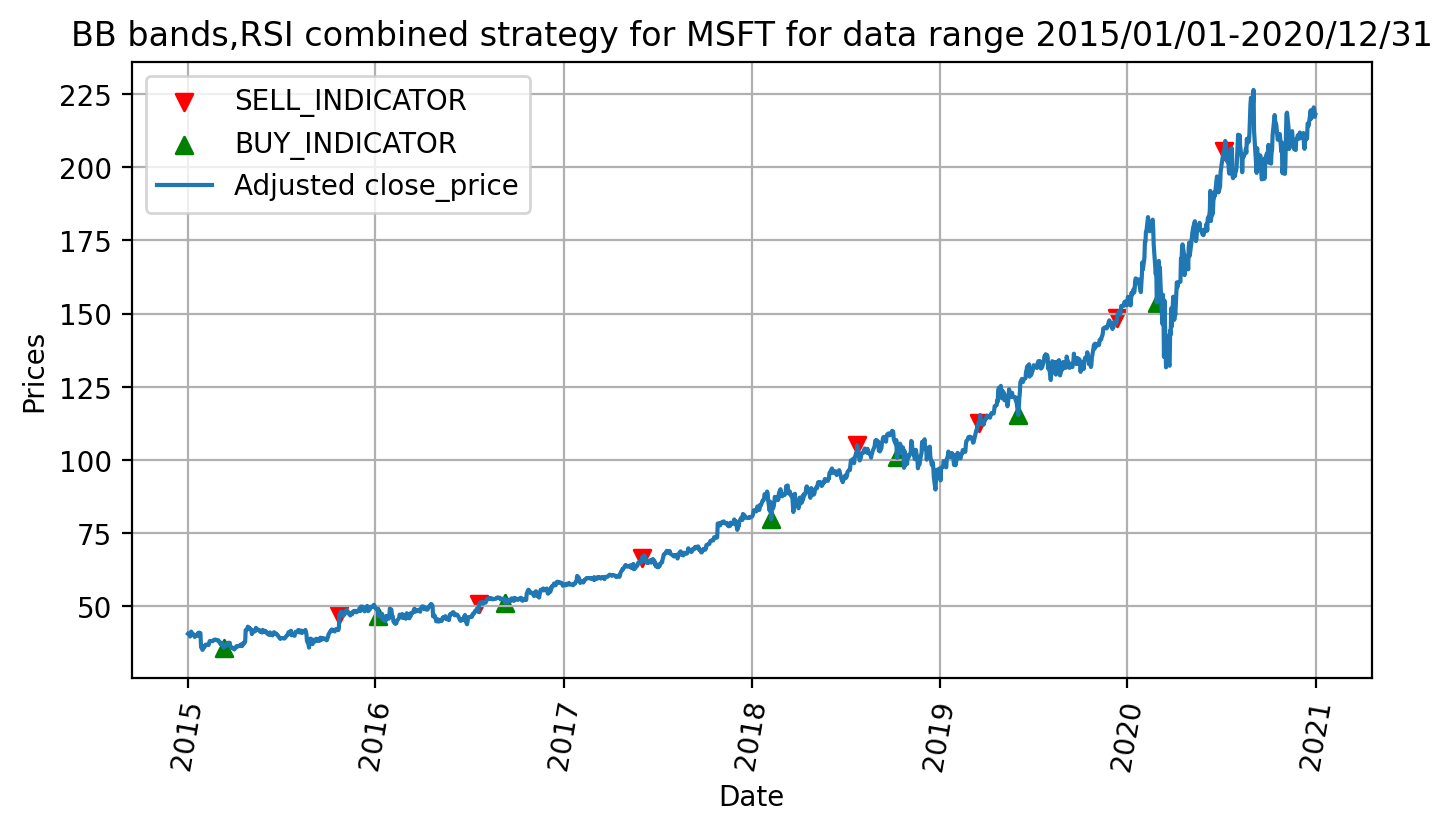

In [21]:
sell_sigs_df = sigs_df[sigs_df['RSI_sell'] ==1]

buy_sigs_df  = sigs_df[sigs_df['RSI_buy'] ==1]

plt.figure(figsize = (8,4), dpi = 200)

plt.scatter(sell_sigs_df.index.to_numpy(), sell_sigs_df.Adj_Close.to_numpy()  ,marker="v",color = 'red', label = 'SELL_INDICATOR')
plt.scatter(buy_sigs_df.index.to_numpy(), buy_sigs_df.Adj_Close.to_numpy() , marker="^",color = 'green',label = 'BUY_INDICATOR')

plt.plot(train_msft_df.index.to_numpy(), train_msft_df.Adj_Close.to_numpy() , label = 'Adjusted close_price')
plt.xticks(rotation=80)
plt.grid()
plt.legend()
plt.xlabel('Date')
plt.ylabel('Prices')
plt.title('BB bands,RSI combined strategy for MSFT for data range 2015/01/01-2020/12/31')
plt.show()



### Defining the backtesting function

In [11]:
def backtest(df, init_amt,commision,buy_col_nm = 'RSI_buy',sell_col_nm='RSI_sell',):
    buy_prices= []
    sell_prices = []
    no_of_stocks_buy = []
    no_of_stocks_sell = []
    buy_date =[]
    buy_comms =[] 
    amt_lefts_buy = []
    sell_date = []
    sell_comms =[] 
    amt_lefts_sell = []

    amt_left = init_amt
    comm = commision
    for ii in range(len(df)):
        
        if df[buy_col_nm][ii] == 1.0:
            amt_lefts_buy.append(amt_left)
            amt_commb = comm * amt_left
            amt_left -= amt_commb 
            no_of_stocks= amt_left/df.Adj_Close[ii]
            no_of_stocks_buy.append(no_of_stocks)
            buy_prices.append(df.Adj_Close[ii])
            buy_date.append(list(df.index)[ii])
            buy_comms.append(amt_commb)  
        elif df[sell_col_nm][ii] == 1.0:
            no_of_stocks_sell.append(no_of_stocks)
            amt_left = no_of_stocks * df.Adj_Close[ii]
            amt_comms = comm * amt_left
            amt_left -= amt_comms
            amt_lefts_sell.append(amt_left)
            sell_prices.append(df.Adj_Close[ii])
            sell_date.append(list(df.index)[ii])
            sell_comms.append(amt_comms)  


    trade_rec_arr = np.array([buy_prices,
    sell_prices,
    # no_of_stocks_buy ,
    no_of_stocks_sell,
    buy_date,
    buy_comms,                           
    amt_lefts_buy,
    sell_date,
    sell_comms,                           
    amt_lefts_sell])

    trade_rec_df = pd.DataFrame(trade_rec_arr.T , columns= ['Buy_Price', 'Sell_Price','No_of_Stocks','Buy_Date','Buy_commision', "Tot_buy_price", 'Sell_Date','Sell_commision', 'Tot_sell_price'])
    trade_rec_df["Returns"] = (trade_rec_df.Tot_sell_price - trade_rec_df.Tot_buy_price)/ trade_rec_df.Tot_buy_price
    trade_rec_df["CummReturns"]  = trade_rec_df["Returns"].cumsum()

    return trade_rec_df






In [12]:
def return_stats(backtest_df):
    last_sell_price = backtest_df['Tot_sell_price'][len(backtest_df) -1]
    initial_buy_price = backtest_df['Tot_buy_price'][0]
    profit = last_sell_price - initial_buy_price
    
    percentage_profit = (profit/initial_buy_price) * 100
    
    
    if profit>0:
        print(f"Profit for the trading period is {round(profit,4)}")
        print(f"Percentage profit for the trading period is {round(percentage_profit,4)}%")
    else:
        print(f'Loss for the trading period is {round(abs(profit),4)}')
        print(f"Percentage loss for the trading period is {round(percentage_profit,4)}%")
    
    
    
    

In [13]:


tr_backtest_df = backtest(sigs_df,30000000,0.01)


tr_backtest_df




,Buy_Price,Sell_Price,No_of_Stocks,Buy_Date,Buy_commision,Tot_buy_price,Sell_Date,Sell_commision,Tot_sell_price,Returns,CummReturns
0,35.966343,46.965374,825772.02973,2015-03-12,300000.0,30000000,2015-10-23,387826.922092,38394865.287084,0.279829,0.279829
1,46.655918,50.711853,814707.29041,2016-01-07,383948.652871,38394865.287084,2016-07-20,413153.163716,40902163.207848,0.065303,0.345132
2,51.301723,66.716316,789313.473871,2016-09-09,409021.632078,40902163.207848,2017-06-02,526600.87322,52133486.448778,0.27459,0.619722
3,79.855179,105.051918,646321.908467,2018-02-08,521334.864488,52133486.448778,2018-07-25,678973.561491,67218382.587595,0.289351,0.909073
4,101.012634,112.832489,658790.845698,2018-10-10,672183.825876,67218382.587595,2019-03-18,743330.108595,73589680.750893,0.094785,1.003858
5,115.436745,148.605026,631114.331395,2019-06-03,735896.807509,73589680.750893,2019-12-12,937867.617806,92848894.162788,0.261711,1.265569
6,153.81459,205.455765,597605.239853,2020-02-27,928488.941628,92848894.162788,2020-07-06,1227814.415848,121553627.16894,0.309155,1.574724


In [14]:


tr_backtest_df['Trade_Returns']  =  tr_backtest_df.Tot_sell_price - tr_backtest_df.Tot_buy_price                    

tr_backtest_df


,Buy_Price,Sell_Price,No_of_Stocks,Buy_Date,Buy_commision,Tot_buy_price,Sell_Date,Sell_commision,Tot_sell_price,Returns,CummReturns,Trade_Returns
0,35.966343,46.965374,825772.02973,2015-03-12,300000.0,30000000,2015-10-23,387826.922092,38394865.287084,0.279829,0.279829,8394865.287084
1,46.655918,50.711853,814707.29041,2016-01-07,383948.652871,38394865.287084,2016-07-20,413153.163716,40902163.207848,0.065303,0.345132,2507297.920764
2,51.301723,66.716316,789313.473871,2016-09-09,409021.632078,40902163.207848,2017-06-02,526600.87322,52133486.448778,0.27459,0.619722,11231323.24093
3,79.855179,105.051918,646321.908467,2018-02-08,521334.864488,52133486.448778,2018-07-25,678973.561491,67218382.587595,0.289351,0.909073,15084896.138817
4,101.012634,112.832489,658790.845698,2018-10-10,672183.825876,67218382.587595,2019-03-18,743330.108595,73589680.750893,0.094785,1.003858,6371298.163298
5,115.436745,148.605026,631114.331395,2019-06-03,735896.807509,73589680.750893,2019-12-12,937867.617806,92848894.162788,0.261711,1.265569,19259213.411894
6,153.81459,205.455765,597605.239853,2020-02-27,928488.941628,92848894.162788,2020-07-06,1227814.415848,121553627.16894,0.309155,1.574724,28704733.006152


In [15]:
return_stats(tr_backtest_df)

Profit for the trading period is 91553627.1689
Percentage profit for the trading period is 305.1788%


### Testing strategy with forthcoming data

In [16]:

test_msft_df = msft_df.loc[datetime.datetime(2021,1,1):,:]
test_sigs_df = filter_unq(test_msft_df)
test_sigs_df



,Open,High,Low,Close,Adj_Close,Volume,bb_bbm,bb_bbh,bb_bbl,bb_buy_manl,bb_sell_manl,RSI,RSI_sell,RSI_buy,position_taking
Date,,,,,,,,,,,,,,,
2021-05-12,242.169998,244.380005,238.070007,239.000000,234.765854,36684400,249.481931,261.902743,237.061119,1,0,35.898918,0,1,True
2021-07-02,272.820007,278.000000,272.500000,277.649994,273.360870,26458000,258.762424,272.000503,245.524346,0,1,77.077125,1,0,True
2021-09-28,289.799988,290.779999,282.750000,283.519989,279.674561,43186200,294.467192,303.495638,285.438746,1,0,33.231122,0,1,True
2021-10-27,316.000000,326.100006,316.000000,323.170013,318.786835,52588700,295.947839,316.456875,275.438803,0,1,74.760560,1,0,True


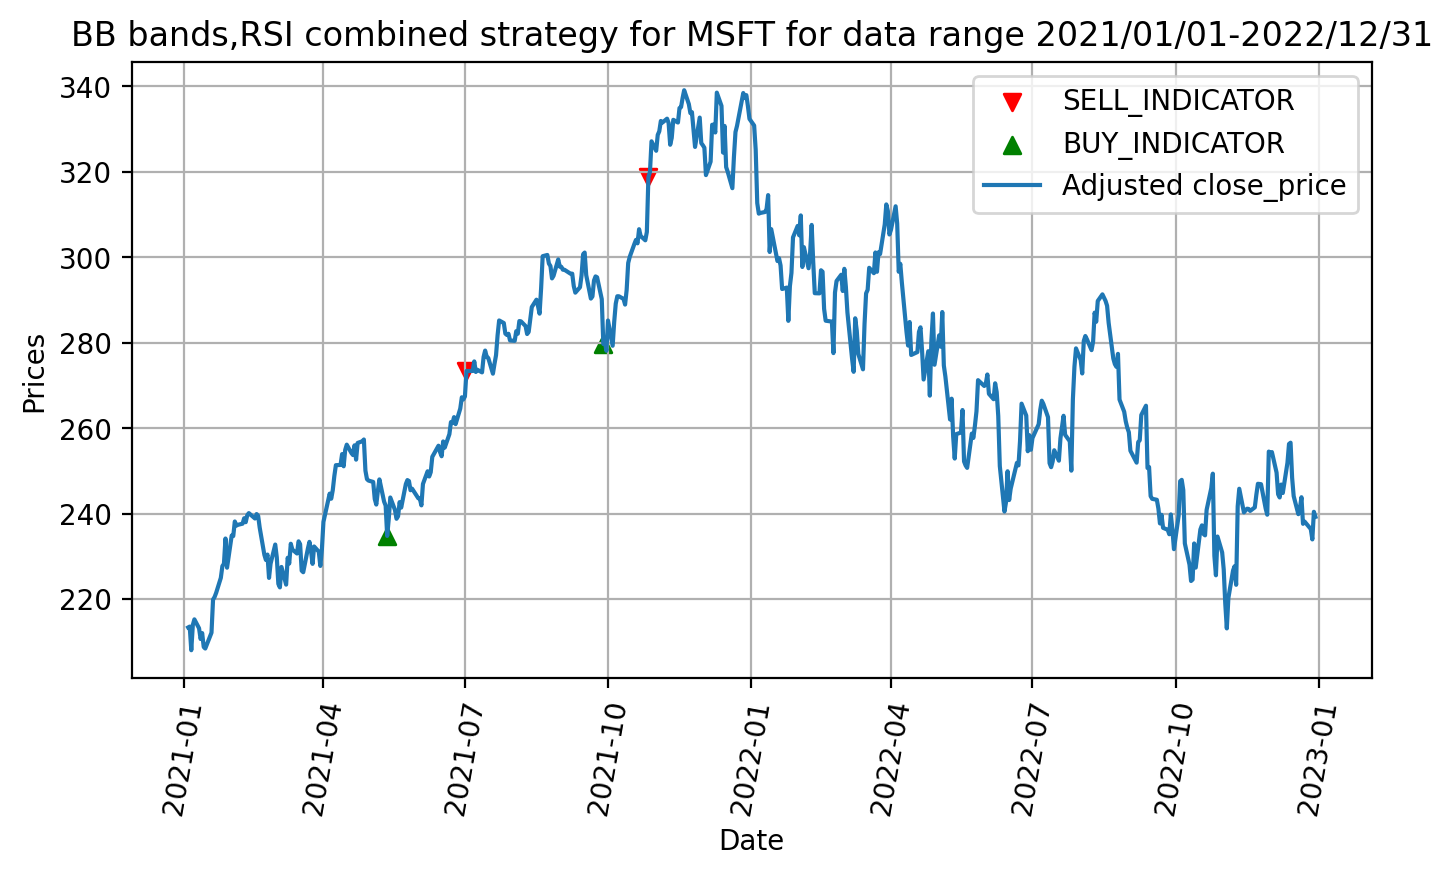

In [22]:

test_sell_sigs_df = test_sigs_df[test_sigs_df['RSI_sell'] ==1]

test_buy_sigs_df  = test_sigs_df[test_sigs_df['RSI_buy'] ==1]
    

plt.figure(figsize = (8,4), dpi = 200)
plt.scatter(test_sell_sigs_df.index.to_numpy(), test_sell_sigs_df.Adj_Close.to_numpy()  ,marker="v",color = 'red', label = 'SELL_INDICATOR')
plt.scatter(test_buy_sigs_df.index.to_numpy(), test_buy_sigs_df.Adj_Close.to_numpy() , marker="^",color = 'green',label = 'BUY_INDICATOR')
plt.plot(test_msft_df.index.to_numpy(), test_msft_df.Adj_Close.to_numpy() , label = 'Adjusted close_price')
plt.xticks(rotation=80)
plt.grid()
plt.xlabel('Date')
plt.ylabel('Prices')
plt.title('BB bands,RSI combined strategy for MSFT for data range 2021/01/01-2022/12/31')
plt.legend()
plt.show()

    

In [18]:


test_backtest_df = backtest(test_sigs_df,30000000,0.01)


test_backtest_df




,Buy_Price,Sell_Price,No_of_Stocks,Buy_Date,Buy_commision,Tot_buy_price,Sell_Date,Sell_commision,Tot_sell_price,Returns,CummReturns
0,234.765854,273.36087,126509.028076,2021-05-12,300000.0,30000000,2021-07-02,345826.180234,34236791.84316,0.141226,0.141226
1,279.674561,318.786835,121192.373945,2021-09-28,342367.918432,34236791.84316,2021-10-27,386345.332818,38248187.948955,0.117166,0.258393


In [19]:
return_stats(test_backtest_df)

Profit for the trading period is 8248187.949
Percentage profit for the trading period is 27.494%
